### **L4 기반(Google pro)**
- **불용어후보(7.2, 월)바탕으로 LDA**

### **한글깨짐 방지 아래 코드 돌리고 재시작**

In [ ]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### **재시작**

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import time
import gzip
import pickle
import os

### **파일 읽기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
start_time = time.time()

# 현재 디렉토리를 확인합니다.
current_dir = '/content/drive/MyDrive/이대과제/data_gzip'

# 파일 리스트를 가져옵니다.
file_list = [f for f in os.listdir(current_dir) if f.endswith('.pkl.gz')]

# 빈 데이터프레임 리스트를 생성합니다.
df_list = []

# 각 gzip 파일을 읽어 데이터프레임으로 변환하고 리스트에 추가합니다.
for file in file_list:
    try:
        with gzip.open(os.path.join(current_dir, file), 'rb') as f:
            data = pickle.load(f)
            df = pd.DataFrame(data)
            if not df.empty:
                df_list.append(df)
            else:
                print(f"Empty DataFrame in file: {file}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")

# 빈 리스트가 아닌지 확인합니다.
if df_list:
    # 모든 데이터프레임을 하나로 합칩니다.
    df = pd.concat(df_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")
'''

'\nstart_time = time.time()\n\n# 현재 디렉토리를 확인합니다.\ncurrent_dir = \'/content/drive/MyDrive/이대과제/data_gzip\'\n\n# 파일 리스트를 가져옵니다.\nfile_list = [f for f in os.listdir(current_dir) if f.endswith(\'.pkl.gz\')]\n\n# 빈 데이터프레임 리스트를 생성합니다.\ndf_list = []\n\n# 각 gzip 파일을 읽어 데이터프레임으로 변환하고 리스트에 추가합니다.\nfor file in file_list:\n    try:\n        with gzip.open(os.path.join(current_dir, file), \'rb\') as f:\n            data = pickle.load(f)\n            df = pd.DataFrame(data)\n            if not df.empty:\n                df_list.append(df)\n            else:\n                print(f"Empty DataFrame in file: {file}")\n    except Exception as e:\n        print(f"Error reading file {file}: {e}")\n\n# 빈 리스트가 아닌지 확인합니다.\nif df_list:\n    # 모든 데이터프레임을 하나로 합칩니다.\n    df = pd.concat(df_list, ignore_index=True)\nelse:\n    print("No valid DataFrames to concatenate.")\n\nend_time = time.time()\nelapsed_time = end_time - start_time\nprint(f"Elapsed time: {elapsed_time:.2f} seconds")\n'

### **prompt: 일자와 언론사가 같은 행만 select**

In [ ]:
'''
print(df.shape)

df = df[~df.duplicated(['일자', '언론사', '제목'])]
print(df.shape)

# df['일자']를 날짜로 변경하고 index로 지정
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)
'''

"\nprint(df.shape)\n\ndf = df[~df.duplicated(['일자', '언론사', '제목'])]\nprint(df.shape)\n\n# df['일자']를 날짜로 변경하고 index로 지정\ndf['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')\ndf['년도']=df['일자'].apply(lambda x: x.year)\ndf['월']=df['일자'].apply(lambda x: x.month)\n"

### **전체 파일 불러오기**

In [ ]:
#df.to_pickle('/content/drive/MyDrive/이대과제/data/df_gzip.pkl', compression='gzip')
# /content/drive/MyDrive/이대과제/data/df_sample_gzip.pkl
df= pd.read_pickle('/content/drive/MyDrive/이대과제/data/df_gzip.pkl', compression='gzip')
print(df.shape)
df.head()

(5641608, 10)


,일자,언론사,제목,통합 분류1,통합 분류2,통합 분류3,기관,특성추출(가중치순 상위 50개),년도,월
0,2010-01-01,세계일보,2010 신년특집-업계 신년 구상/IT/SK 3조 투자 이종산업과 접목 주력,경제>산업_기업,IT_과학>모바일,IT_과학>인터넷_SNS,"FMC,IPE,KT,KTF,SK텔레콤,네이버,대상,정보통신","네트워크,3조,네이버,sk텔레콤,일본,사용자,kt,장악력,생산성,융합사업,이종산업,...",2010,1
1,2010-01-01,전자신문,[2010 신년특집] 해외 IT융합 프로젝트-일본 및 아시아국가,경제>자원,NaN,NaN,"민주당,일본,이화학연구소,문부과학성,건설공사,인도네시아,싱가포르,태양광발전소,그린I...","일본,싱가포르,슈퍼컴퓨터,전자폐기물,스마트그리드,대만,전력망,신재생,연구소,각국,차...",2010,1
2,2010-01-01,내일신문,소비양극화 백화점 인터넷쇼핑 성장,경제>산업_기업,경제>유통,경제>자동차,"후레쉬푸드,아울렛,타임스퀘어,슈퍼","백화점,편의점,온라인,대형마트,경쟁력,유통산업발전법,복합몰,유통업,신세계,쇼핑몰,신장세",2010,1
3,2010-01-01,이데일리,2010년 `보건의료분야` 이렇게 달라져요,사회>의료_건강,사회>장애인,NaN,"문화재단,시군구청,정부,사회복,식약청,사회복지,사회복지통합관리망,요양병원","장애인,진료비,의료기관,진단서,이데일리,소비자,건강보험,영유아,치료제,보건소,만4세...",2010,1
4,2010-01-01,이데일리,"이 대통령 ""상반기까진 출구전략 신중""",정치>청와대,정치>외교,NaN,"국무회의,정부,국무위","이데일리,상반기,일자리,선제적,공직자들,공직자,민간기업,해외진출,출구전략,재정지출,...",2010,1


In [ ]:
# 필요한 컬럼만 추출
df= df[['일자', '특성추출(가중치순 상위 50개)']]

## **Sampling**

In [ ]:
df= df.sample(frac=0.4)
# df= df.sample(frac=0.4, random_state=74)

### **불용어**

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/이대과제/data/불용어후보.xlsx')
print(data.shape)
data.tail()

# 불용어 처리
stop_words = data[data['불용어_0705'] == 1]['단어'].tolist()

(4921, 11)


,단어,불룡어?,유형,이대,불용어_0622,불용어_0625,불용어_0627,불용어_0702,불용어_0703,불용어_0704,불용어_0705
4916,불필요,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4917,당국자,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4918,국가,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4919,원주,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4920,신청자,NaN,추가작업_0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
'''
# corpus 정제
import re

def preprocess_corpus(corpus):
    updated_corpus = []
    pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])')
    pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')

    for document in corpus:
        if isinstance(document, str):
            words = document.split(',')
            filtered_words = [word for word in words if pattern_korean_english.match(word) and not pattern_mixed.search(word)]
            updated_corpus.append(','.join(filtered_words))
        else:
            updated_corpus.append('')
    return updated_corpus
'''

"\n# corpus 정제\nimport re\n\ndef preprocess_corpus(corpus):\n    updated_corpus = []\n    pattern_mixed = re.compile(r'(?=.*\\d)(?=.*[a-zA-Z가-힣])')\n    pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')\n\n    for document in corpus:\n        if isinstance(document, str):\n            words = document.split(',')\n            filtered_words = [word for word in words if pattern_korean_english.match(word) and not pattern_mixed.search(word)]\n            updated_corpus.append(','.join(filtered_words))\n        else:\n            updated_corpus.append('')\n    return updated_corpus\n"

## **corpus**

In [ ]:
'''
corpus = []
#for keywords in df['특성추출(가중치순 상위 50개)']:
for keywords in df['특성추출(가중치순 상위 50개)']:
    corpus.append(keywords)
corpus[:2]

# 각 년도별 corpus 정제
cleaned_corpus = preprocess_corpus(corpus)
cleaned_corpus[:2]

corpus = cleaned_corpus
'''

"\ncorpus = []\n#for keywords in df['특성추출(가중치순 상위 50개)']:\nfor keywords in df['특성추출(가중치순 상위 50개)']:\n    corpus.append(keywords)\ncorpus[:2]\n\n# 각 년도별 corpus 정제\ncleaned_corpus = preprocess_corpus(corpus)\ncleaned_corpus[:2]\n\ncorpus = cleaned_corpus\n"

### **CountVectorizer, TfidfVectorizer,TfidfTransformer**

In [ ]:
'''
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
vect = CountVectorizer(stop_words = stop_words,
                       ngram_range=(1, 1),
                       min_df= 0.0025,
                       max_df= 0.9)

X = vect.fit_transform(corpus) # Doc-Term Matrix 계산
len(vect.get_feature_names_out())
X

from scipy import sparse
X.toarray()
sparse.csr_matrix(X.toarray())
'''

'\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer\nvect = CountVectorizer(stop_words = stop_words,\n                       ngram_range=(1, 1),\n                       min_df= 0.0025,\n                       max_df= 0.9)\n\nX = vect.fit_transform(corpus) # Doc-Term Matrix 계산\nlen(vect.get_feature_names_out())\nX\n\nfrom scipy import sparse\nX.toarray()\nsparse.csr_matrix(X.toarray())\n'

In [ ]:
#pd.DataFrame(X.toarray(), columns = vect.get_feature_names_out())

## 1. 사이킷런을 이용한 토픽 모델링
- **[파이썬 텍스트 마이닝 완벽 가이드](https://github.com/wikibook/textmining/blob/main/Ch%2007.%20%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb)**
### **LDA**

In [ ]:
'''
from sklearn.decomposition import LatentDirichletAllocation
# 5개의 주제만 뽑았으니 n_components(토픽개수) 5로 설정
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# components_속성은 5개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌
print(lda.components_.shape)
print(lda.components_)
'''

'\nfrom sklearn.decomposition import LatentDirichletAllocation\n# 5개의 주제만 뽑았으니 n_components(토픽개수) 5로 설정\nlda = LatentDirichletAllocation(n_components=5, random_state=42)\nlda.fit(X)\n# components_속성은 5개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌\nprint(lda.components_.shape)\nprint(lda.components_)\n'

## **<font color='blue'> gensim을 이용하여 LDA**

- 하이퍼파라미터 3개 부터 10개 LDA수행 후 토픽 개수 결정
- topic : 당신이 가설로 잡은 토픽의 갯수는?
- chunksize : 얼마나 많은 문서가 훈련 알고리즘에 사용되는가?
- 만약에 빠른 학습이 중요하시다면, 청크사이즈를 키워서 돌려봅시다!
- Hoffman의 논문에 의하면 Chunksize는 모델 품질에 영향을 미치지만 차이그 그렇게 크진 않다고 합니다!
- passes : 패스는 모델 학습시 전체 코퍼스에서 모델을 학습시키는 빈도를 제어한다고 합니다. epochs 와 같은 용어 같다! model를 학습시키는 횟수를 말하는것 같아요! model sampling?
- iteration : 각각 문서에 대해서 루프를 얼마나 돌리는지를 제어한다고 합니다.
pass & iteration 은 최대한 많은게 좋다!
- eval_every = 1 in LdaModel
- alpha, eta = auto, 디리클레 분포의 감마함수에 대한 파라미터입니다!

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess # lemmatize is no longer in gensim.utils
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import RegexpTokenizer

### **정규표현식으로 필요한 단어만 추출하거나, 불필요한 단어를 삭제**

In [ ]:
RegTok = RegexpTokenizer("[\w']{2,}") # 정규포현식으로 토크나이저를 정의
food_stops = set(stop_words) # 불용어를 가져옴

# Compile the additional regular expressions
pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])') # 숫자와 알파벳 또는 한글이 모두 포함된 문자열을 찾는 정규 표현식
pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')  # 한글과 알파벳으로만 구성된 문자열을 찾는 정규 표현식

# Define the pattern to remove words containing both numbers and either English or Korean characters
pattern_remove = re.compile(r'\d+[a-zA-Z가-힣]+|[a-zA-Z가-힣]+\d+')  # 90ml', '1항', '3qo', '30개국' 등과 같이 수자와 영문, 수자와 한글이 나오는 단어를 제거

def tokenizer(text):
    tokens = RegTok.tokenize(text)
    # Filter out stop words and apply the additional patterns
    words = [word for word in tokens if (word not in food_stops) and
             (len(word) >= 2) and
             not pattern_remove.match(word) and
             (pattern_mixed.match(word) or pattern_korean_english.match(word))]
    return words

In [ ]:
# Check the data types in your DataFrame
print(df['특성추출(가중치순 상위 50개)'].dtypes)

# If the column is not of type string, convert it:
df['특성추출(가중치순 상위 50개)'] = df['특성추출(가중치순 상위 50개)'].astype(str)

texts = [tokenizer(news) for news in df['특성추출(가중치순 상위 50개)']]

object


### **기본 현황**

In [ ]:
from tqdm import tqdm
# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in tqdm(texts)]

# Create Corpus: Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in data_words if text not in stop_words]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 1869005
#Number of unique words after removing rare and common words: 2000


100%|██████████| 2256643/2256643 [00:20<00:00, 110521.19it/s]

#Number of unique tokens: 2000
#Number of documents: 2256643


### **Topic수에 따라 Clustering하고 시각화**

In [ ]:
%%capture
!pip install pyLDAvis

### **혼란도와 토픽 응집도를 이용한 최적값 선택**
- https://github.com/wikibook/textmining/blob/main/Ch%2007.%20%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb

num_topics: 3, perplexity: -6.782, coherence: -3.675
num_topics: 4, perplexity: -6.834, coherence: -3.930
num_topics: 5, perplexity: -6.909, coherence: -3.885
num_topics: 6, perplexity: -7.010, coherence: -4.187
num_topics: 7, perplexity: -7.094, coherence: -4.275
num_topics: 8, perplexity: -7.101, coherence: -4.638
num_topics: 9, perplexity: -7.151, coherence: -4.593
num_topics: 10, perplexity: -7.179, coherence: -4.804


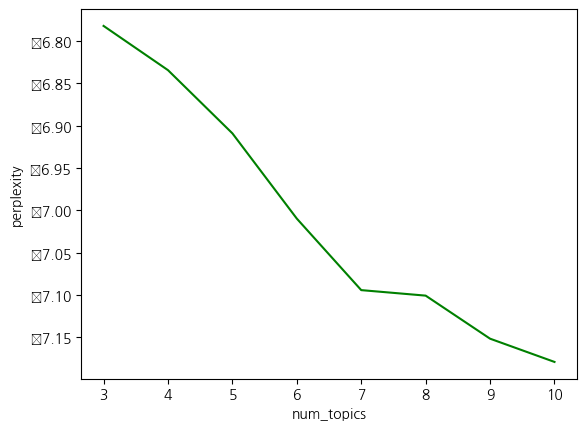

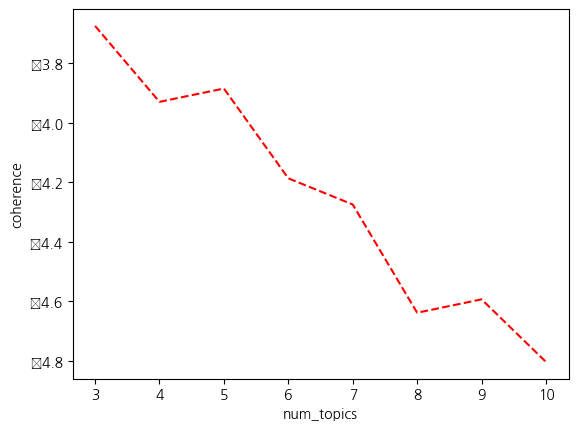

In [ ]:
'''
from gensim.models import CoherenceModel
from gensim.models import LdaModel # Import LdaModel

def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus,
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=3, end=10)
'''

In [ ]:
from gensim.models import LdaModel
import pyLDAvis.gensim # Now this import should work , !pip install pyLDAvis
from tqdm import tqdm
from datetime import date

num_topics = [7]
for num_topics in  tqdm(num_topics):
    passes = 5
    %time model = LdaModel(corpus=corpus, id2word=dictionary,\
                           passes=passes, num_topics=num_topics, \
                           random_state=7)

    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)

    pyLDAvis.save_html(vis, str(num_topics) + '_topics_' + str(date.today()) + '---' + '.html')

  0%|          | 0/1 [00:00<?, ?it/s]

## **Topic의 개수를 정하고 model을 결정**

## **Topic에 따라 아래 분석**

In [ ]:
'''
model = LdaModel(corpus=corpus, id2word=dictionary,\
                           passes=passes, num_topics=_topic_, \
                           random_state=7)
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for topic in model.print_topics():
    print(topic)

with open(f'{str(num_topics)}_topics.txt', 'w', encoding='utf-8') as file:
        for topic in model.print_topics():
            file.write(str(topic) + '\n')

(0, '0.029*"농산물" + 0.017*"소비자" + 0.017*"보건소" + 0.013*"식습관" + 0.013*"식생활" + 0.012*"음식점" + 0.012*"건강관리" + 0.011*"전문가" + 0.011*"식중독" + 0.011*"식품"')
(1, '0.060*"빅데이터" + 0.053*"ai" + 0.039*"인공지능" + 0.034*"공무원" + 0.026*"우리나라" + 0.018*"전문가" + 0.016*"편의점" + 0.013*"스마트폰" + 0.009*"판매량" + 0.007*"가상현실"')
(2, '0.040*"편의점" + 0.036*"스마트폰" + 0.023*"페이스북" + 0.022*"안전관리" + 0.021*"안전사고" + 0.016*"이마트" + 0.015*"전문가" + 0.014*"겨울철" + 0.014*"여름철" + 0.012*"감염병"')
(3, '0.069*"지자체" + 0.033*"간담회" + 0.023*"전문가" + 0.014*"우리나라" + 0.013*"공무원" + 0.013*"맞춤형" + 0.012*"환경부" + 0.012*"취약계층" + 0.010*"수산물" + 0.009*"안전망"')
(4, '0.116*"온라인" + 0.058*"소비자" + 0.031*"전문가" + 0.026*"편의점" + 0.025*"코로나" + 0.021*"오프라인" + 0.018*"소상공인" + 0.018*"소비자들" + 0.017*"빅데이터" + 0.015*"유튜브"')
(5, '0.063*"학생들" + 0.045*"학부모" + 0.027*"교육부" + 0.023*"교육청" + 0.021*"학교" + 0.020*"고등학교" + 0.018*"학생" + 0.018*"교육" + 0.017*"어린이집" + 0.016*"유치원"')
(6, '0.063*"캠페인" + 0.028*"지역" + 0.025*"안전" + 0.020*"사업" + 0.019*"예방" + 0.019*"활동" + 0.015*"대상" + 0.014*"행사" + 0.013*"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


145

149

149

147

149

144

136

### **LDA 년도별 문서 분포 결과 출력**

### **1. 문서집단(corpus)을 바탕으로 온라인 기사별로 토픽별 비중을 확인**


In [ ]:
doc_topics =[]
for topic_list in tqdm(model[corpus]):
    ulist =[]
    for j in range(len(topic_list)):
        ulist.append(topic_list[j][1]) # topic 이 5개인 경우
    doc_topics.append(ulist)

pd.DataFrame(doc_topics).head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 2256643/2256643 [04:11<00:00, 8984.37it/s]


,0,1,2,3,4,5,6
0,0.035718,0.035718,0.535732,0.035718,0.285680,0.035718,0.035718
1,0.488449,0.023810,0.023810,0.023810,0.392500,0.023810,0.023810
2,0.071431,0.071431,0.071431,0.071431,0.071431,0.571417,0.071431


In [ ]:
# pd.DataFrame(doc_topics).sum(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2256638    1.0
2256639    1.0
2256640    1.0
2256641    1.0
2256642    1.0
Length: 2256643, dtype: float64

### **2. 문서집단(corpus)을 바탕으로 년도별로 온라인 기사의 토픽별 비중을 확인**
#### **Assuming topics; topic_num = ?**

In [ ]:
topic_list = np.argmax(pd.DataFrame(doc_topics).values, axis=1).tolist()

# Sample data (for demonstration purposes, replace with your actual data)
tf = pd.DataFrame({
    '일자': pd.date_range(start='2010-01-01', end='2024-12-31', freq='M'),
    '문서': np.random.randint(0, 100, size=(180,))
})

# Ensure topic_list has the same length as tf########################
# Assuming topics####################################################
#####################################################################
doc_topics = np.random.rand(len(tf), num_topics)
topic_list = np.argmax(doc_topics, axis=1).tolist()

# LDA 년도별 문서 분포 결과 출력
start_year = 2010
end_year = 2024
result_df = pd.DataFrame()  # Initialize result_df before the loop

for year in tqdm(range(start_year, end_year + 1)):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_idx = (tf['일자'] >= start_date) & (tf['일자'] <= end_date)
    sub_tf = tf[dt_idx]

    # Ensure indices are within bounds
    valid_indices = [i for i in dt_idx.index[dt_idx] if i < len(topic_list)]
    sub_topic_list = [topic_list[i] for i in valid_indices]

    result = []
    for t in range(max(topic_list) + 1):
        # Count occurrences of each topic in sub_topic_list
        num = sub_topic_list.count(t)
        result.append(num)
    result = pd.Series(result, name=str(year))
    result_df = pd.concat([result_df, result], axis=1)

# 비율로 만들기
result_df = result_df.T.apply(lambda x: x / x.sum(), axis=1)
result_df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 15/15 [00:00<00:00, 691.76it/s]


,0,1,2,3,4,5,6
2010,0.166667,0.333333,0.083333,0.000000,0.083333,0.083333,0.250000
2011,0.166667,0.333333,0.000000,0.083333,0.000000,0.250000,0.166667
2012,0.000000,0.166667,0.083333,0.000000,0.166667,0.166667,0.416667


In [ ]:
# result_df.sum(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
2023    1.0
2024    1.0
dtype: float64

### **3. 문서집단(corpus)을 바탕으로 온라인 기사별로 토픽별 비중 시각화**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.08333333333333333, 0.0, '16.7')

Text(0.08333333333333333, 1.0, '16.7')

Text(0.0, 2.0, '0.0')

Text(0.20833333333333334, 3.0, '41.7')

Text(0.041666666666666664, 4.0, '8.3')

Text(0.08333333333333333, 5.0, '16.7')

Text(0.08333333333333333, 6.0, '16.7')

Text(0.125, 7.0, '25.0')

Text(0.041666666666666664, 8.0, '8.3')

Text(0.041666666666666664, 9.0, '8.3')

Text(0.125, 10.0, '25.0')

Text(0.16666666666666666, 11.0, '33.3')

Text(0.041666666666666664, 12.0, '8.3')

Text(0.0, 13.0, '0.0')

Text(0.08333333333333333, 14.0, '16.7')

Text(0.33333333333333337, 0.0, '33.3')

Text(0.33333333333333337, 1.0, '33.3')

Text(0.08333333333333333, 2.0, '16.7')

Text(0.45833333333333337, 3.0, '8.3')

Text(0.20833333333333331, 4.0, '25.0')

Text(0.29166666666666663, 5.0, '25.0')

Text(0.29166666666666663, 6.0, '25.0')

Text(0.4166666666666667, 7.0, '33.3')

Text(0.125, 8.0, '8.3')

Text(0.0, 9.0, '0.0')

Text(0.0, 10.0, '0.0')

Text(0.375, 11.0, '8.3')

Text(0.16666666666666669, 12.0, '16.7')

Text(0.12499999999999999, 13.0, '25.0')

Text(0.20833333333333331, 14.0, '8.3')

Text(0.5416666666666667, 0.0, '8.3')

Text(0.0, 1.0, '0.0')

Text(0.20833333333333331, 2.0, '8.3')

Text(0.5416666666666667, 3.0, '8.3')

Text(0.4999999999999999, 4.0, '33.3')

Text(0.0, 5.0, '0.0')

Text(0.4583333333333333, 6.0, '8.3')

Text(0.625, 7.0, '8.3')

Text(0.375, 8.0, '41.7')

Text(0.16666666666666663, 9.0, '16.7')

Text(0.3333333333333333, 10.0, '16.7')

Text(0.49999999999999994, 11.0, '16.7')

Text(0.375, 12.0, '25.0')

Text(0.3333333333333333, 13.0, '16.7')

Text(0.0, 14.0, '0.0')

Text(0.0, 0.0, '0.0')

Text(0.5416666666666667, 1.0, '8.3')

Text(0.0, 2.0, '0.0')

Text(0.0, 3.0, '0.0')

Text(0.0, 4.0, '0.0')

Text(0.45833333333333326, 5.0, '8.3')

Text(0.5416666666666666, 6.0, '8.3')

Text(0.7083333333333333, 7.0, '8.3')

Text(0.6666666666666667, 8.0, '16.7')

Text(0.3333333333333333, 9.0, '16.7')

Text(0.49999999999999994, 10.0, '16.7')

Text(0.7083333333333333, 11.0, '25.0')

Text(0.5416666666666667, 12.0, '8.3')

Text(0.45833333333333326, 13.0, '8.3')

Text(0.3333333333333333, 14.0, '16.7')

Text(0.625, 0.0, '8.3')

Text(0.0, 1.0, '0.0')

Text(0.3333333333333333, 2.0, '16.7')

Text(0.625, 3.0, '8.3')

Text(0.0, 4.0, '0.0')

Text(0.5833333333333333, 5.0, '16.7')

Text(0.0, 6.0, '0.0')

Text(0.0, 7.0, '0.0')

Text(0.7916666666666667, 8.0, '8.3')

Text(0.4583333333333333, 9.0, '8.3')

Text(0.0, 10.0, '0.0')

Text(0.0, 11.0, '0.0')

Text(0.625, 12.0, '8.3')

Text(0.6666666666666666, 13.0, '33.3')

Text(0.49999999999999994, 14.0, '16.7')

Text(0.7083333333333335, 0.0, '8.3')

Text(0.7083333333333334, 1.0, '25.0')

Text(0.49999999999999994, 2.0, '16.7')

Text(0.75, 3.0, '16.7')

Text(0.7083333333333333, 4.0, '8.3')

Text(0.7083333333333333, 5.0, '8.3')

Text(0.6666666666666665, 6.0, '16.7')

Text(0.875, 7.0, '25.0')

Text(0.0, 8.0, '0.0')

Text(0.6666666666666666, 9.0, '33.3')

Text(0.6666666666666665, 10.0, '16.7')

Text(0.875, 11.0, '8.3')

Text(0.7916666666666667, 12.0, '25.0')

Text(0.9166666666666665, 13.0, '16.7')

Text(0.6666666666666665, 14.0, '16.7')

Text(0.875, 0.0, '25.0')

Text(0.9166666666666667, 1.0, '16.7')

Text(0.7916666666666665, 2.0, '41.7')

Text(0.9166666666666667, 3.0, '16.7')

Text(0.875, 4.0, '25.0')

Text(0.875, 5.0, '25.0')

Text(0.8749999999999998, 6.0, '25.0')

Text(0.0, 7.0, '0.0')

Text(0.9166666666666667, 8.0, '16.7')

Text(0.9166666666666665, 9.0, '16.7')

Text(0.8749999999999998, 10.0, '25.0')

Text(0.9583333333333333, 11.0, '8.3')

Text(0.9583333333333334, 12.0, '8.3')

Text(0.0, 13.0, '0.0')

Text(0.8749999999999998, 14.0, '25.0')

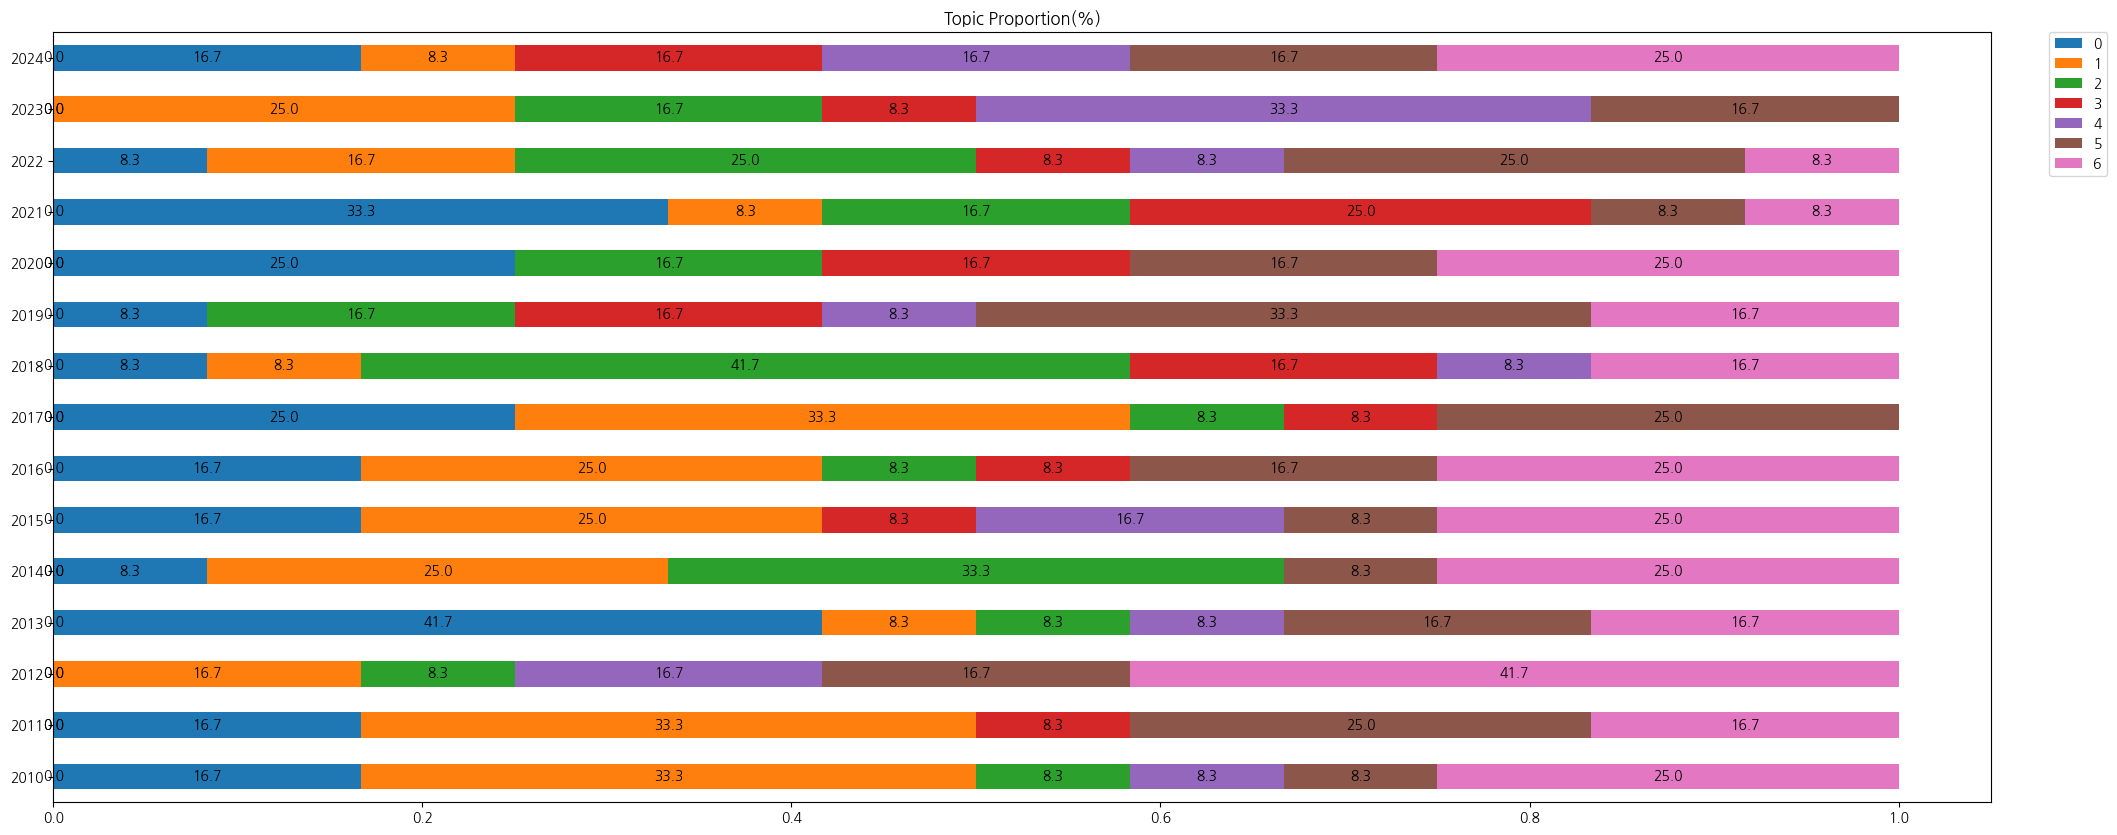

In [ ]:
ax = result_df.plot.barh(stacked=True,legend=False,figsize=(25, 10), title="Topic Proportion(%)")
ax.legend(bbox_to_anchor=(1.03, 1),loc=2, borderaxespad=0.)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

# Save the figure as a PNG file
ax.figure.savefig(f'{num_topics}_topics_비중.png')

### **4. 문서집단(corpus)을 바탕으로 각 토픽의 년도별 비중의 추세 확인**

In [ ]:
# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]

doc_topics =[]
for topic_list in model[corpus]:
    ulist =[]
    for j in range(len(topic_list)):
        ulist.append(topic_list[j][1])
    doc_topics.append(ulist)

pd.DataFrame(doc_topics).head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
0,0.035718,0.035718,0.535732,0.035718,0.285680,0.035718,0.035718
1,0.488503,0.023810,0.023810,0.023810,0.392446,0.023810,0.023810
2,0.071431,0.071431,0.071431,0.071431,0.071431,0.571417,0.071431


In [ ]:
trend_data = pd.DataFrame(doc_topics)
trend_data['start'] = df['일자'].values
trend_data = trend_data.set_index('start')
trend_data = trend_data.resample('M').mean()
trend_data.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
start,,,,,,,
2010-01-31,0.152697,0.133377,0.114877,0.157579,0.157934,0.139006,0.148887
2010-02-28,0.148349,0.132673,0.120768,0.150027,0.146371,0.144649,0.161677
2010-03-31,0.152512,0.121663,0.117776,0.145233,0.149110,0.155249,0.164649


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Topic 0: 월별 추세선')

Text(0.5, 1.0, 'Topic 1: 월별 추세선')

Text(0.5, 1.0, 'Topic 2: 월별 추세선')

Text(0.5, 1.0, 'Topic 3: 월별 추세선')

Text(0.5, 1.0, 'Topic 4: 월별 추세선')

Text(0.5, 1.0, 'Topic 5: 월별 추세선')

Text(0.5, 1.0, 'Topic 6: 월별 추세선')

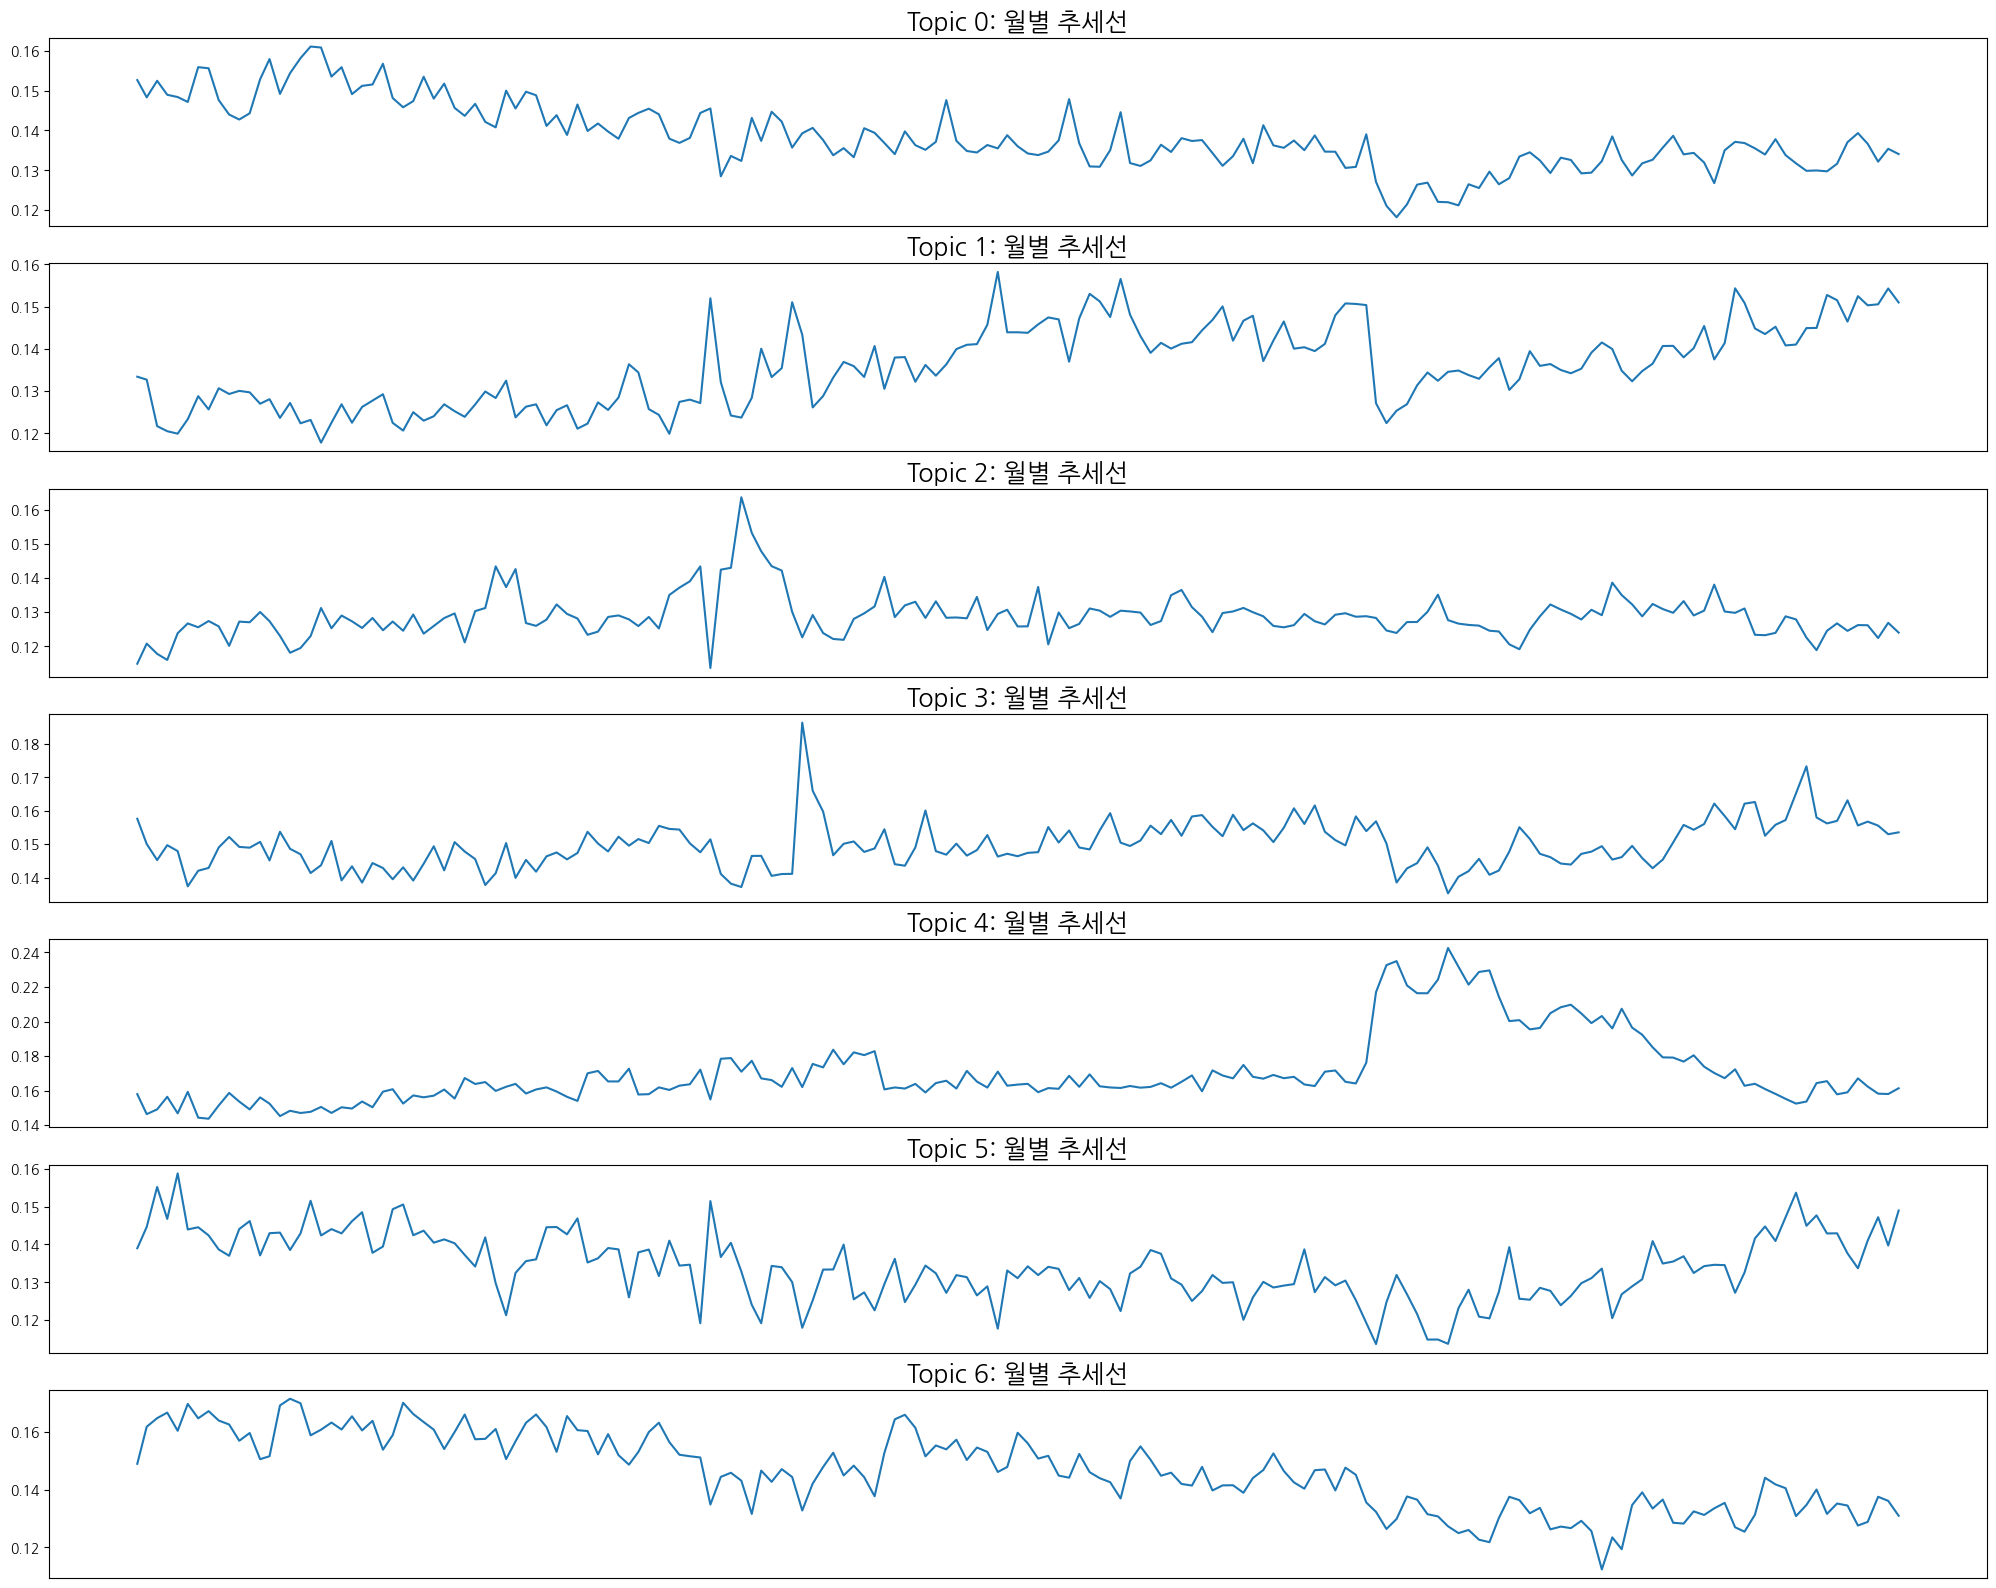

In [ ]:
fig, axes = plt.subplots(num_topics, 1, sharex='col', figsize=(25, 20))

for col, ax in zip(trend_data.columns.tolist(), axes.ravel()):
    ax.set_title(f'Topic {col}: 월별 추세선', fontsize=18)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend_data[col])
ax.figure.savefig(f'{num_topics}_topic_비중 추세.png')

## **END**